In [1]:
!conda install -y gdown

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-23.7.4               |  py310hff52083_0        1006 KB  conda-forge
    filelock-3.12.4            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-4.7.1                |     pyhd8ed1ab_0          19 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.0 MB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.12.4-pyhd8ed1ab_0 
  gdown              conda-forge/noarch::gdown-4.7.1-pyhd8ed1ab_0 

The following packages will be UPDATED:

  conda                              23.7.3-py310hff52083_0 --> 23.7.4-py310hff52083_0 



filelock-3.1

In [2]:
!gdown --id 1mWaAM3WU7rW8Dflr7yc87cPzaYEYgx3i

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1mWaAM3WU7rW8Dflr7yc87cPzaYEYgx3i
From (redirected): https://drive.google.com/uc?id=1mWaAM3WU7rW8Dflr7yc87cPzaYEYgx3i&confirm=t&uuid=50b5cd27-24d5-462e-9ccf-d1efe0634a0f
To: /kaggle/working/Copy of FraudDetectionDataset.csv
100%|███████████████████████████████████████| 1.65G/1.65G [00:05<00:00, 292MB/s]


In [65]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, KFold
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report

In [6]:
#loading in the dataset
df = pd.read_csv("/kaggle/working/Copy of FraudDetectionDataset.csv")
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [7]:
#displaying the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

In [9]:
df.shape

(6000000, 32)

In [10]:
#checking for missing values
df.isnull().sum()

Transaction ID                       0
User ID                              0
Transaction Amount                   0
Transaction Date and Time            0
Merchant ID                          0
Payment Method                       0
Country Code                         0
Transaction Type                     0
Device Type                          0
IP Address                           0
Browser Type                         0
Operating System                     0
Merchant Category                    0
User Age                             0
User Occupation                      0
User Income                          0
User Gender                          0
User Account Status                  0
Transaction Status                   0
Location Distance                    0
Time Taken for Transaction           0
Transaction Time of Day              0
User's Transaction History           0
Merchant's Reputation Score          0
User's Device Location               0
Transaction Currency     

In [11]:
#displaying the summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,6000000.0,5.501906e+07,2.598067e+07,10000041.00,3.251666e+07,55029874.00,7.752487e+07,99999883.0
User ID,6000000.0,5.499571e+03,2.598744e+03,1000.00,3.248000e+03,5499.00,7.751000e+03,9999.0
Transaction Amount,6000000.0,5.005515e+02,2.884166e+02,1.00,2.507900e+02,500.51,7.504400e+02,1000.0
Merchant ID,6000000.0,5.500817e+03,2.598350e+03,1000.00,3.251000e+03,5501.00,7.752000e+03,9999.0
User Age,6000000.0,4.900159e+01,1.818538e+01,18.00,3.300000e+01,49.00,6.500000e+01,80.0
User Income,6000000.0,5.049328e+04,2.858223e+04,1000.02,2.573446e+04,50502.94,7.523454e+04,100000.0
Location Distance,6000000.0,5.050600e+01,2.857562e+01,1.00,2.576000e+01,50.51,7.525000e+01,100.0
Time Taken for Transaction,6000000.0,3.049492e+01,1.703567e+01,1.00,1.574000e+01,30.50,4.526000e+01,60.0
User's Transaction History,6000000.0,5.048393e+01,2.886705e+01,1.00,2.500000e+01,50.00,7.500000e+01,100.0
Merchant's Reputation Score,6000000.0,2.999382e+00,1.154479e+00,1.00,2.000000e+00,3.00,4.000000e+00,5.0


**UNIVARIATE ANALYSIS**

Payment Method
Amazon Pay               150781
Cryptocurrency Wallet    150646
Afterpay                 150570
E-check                  150521
Masterpass               150467
Debit Card               150370
Alipay                   150366
Mobile Wallet            150349
Ethereum                 150332
Visa Checkout            150297
Diners Club              150291
Stripe                   150159
Apple Pay                150143
2Checkout                150115
Contactless Payment      150088
Bank Transfer            150088
Check                    150086
Bitcoin                  150076
Credit Card              150043
NFC Payment              150033
American Express         149964
Square Cash              149935
Money Order              149914
Google Wallet            149905
Wire Transfer            149888
WeChat Pay               149869
Direct Debit             149847
Neteller                 149768
Worldpay                 149760
Klarna                   149734
Prepaid Card             

Text(0.5, 1.0, 'Distribution of Payment Method')

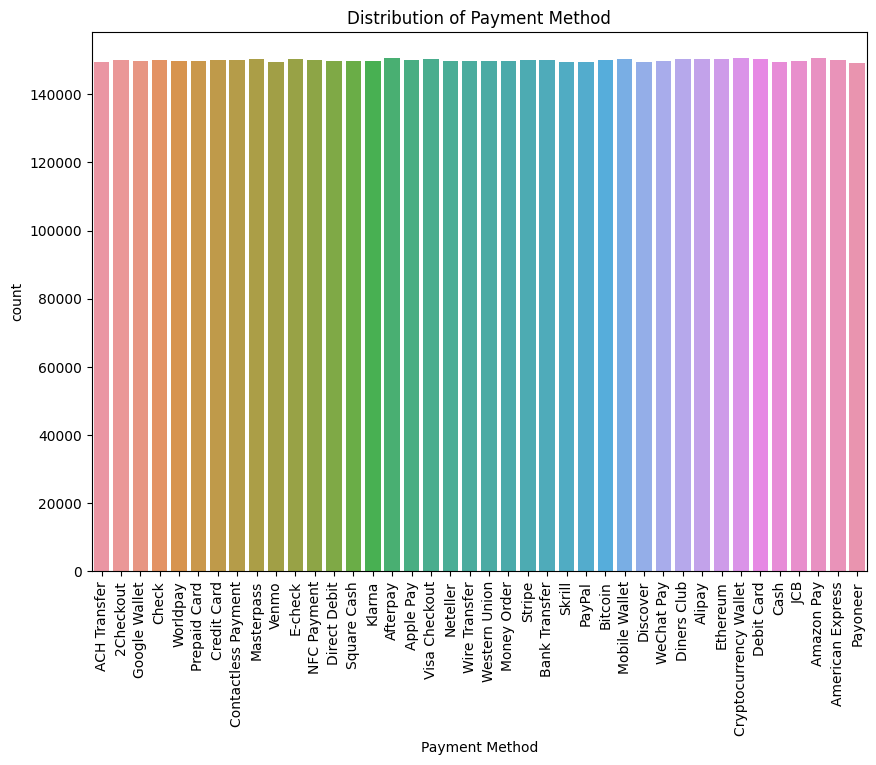

In [12]:
print(df["Payment Method"].value_counts())
print(df["Payment Method"].nunique())
plt.figure(figsize=(10,7))
sns.countplot(x=df["Payment Method"])
plt.xticks(rotation=90)
plt.title("Distribution of Payment Method")

In [13]:
print(df["Country Code"].unique())
print(df["Country Code"].nunique())

['KOR' 'VNM' 'MEX' 'SGP' 'HKG' 'THA' 'CHE' 'CAN' 'TAI' 'QAT' 'JPN' 'USA'
 'BRA' 'IDN' 'EGY' 'GER' 'BEL' 'AUT' 'IND' 'NZL' 'NGA' 'ESP' 'SAU' 'ISR'
 'MAL' 'UK' 'NLD' 'SWE' 'FRA' 'AUS' 'ARG' 'GRE' 'CHN' 'NOR' 'TUR' 'RUS'
 'ITA' 'POL' 'UAE' 'ZAF']
40


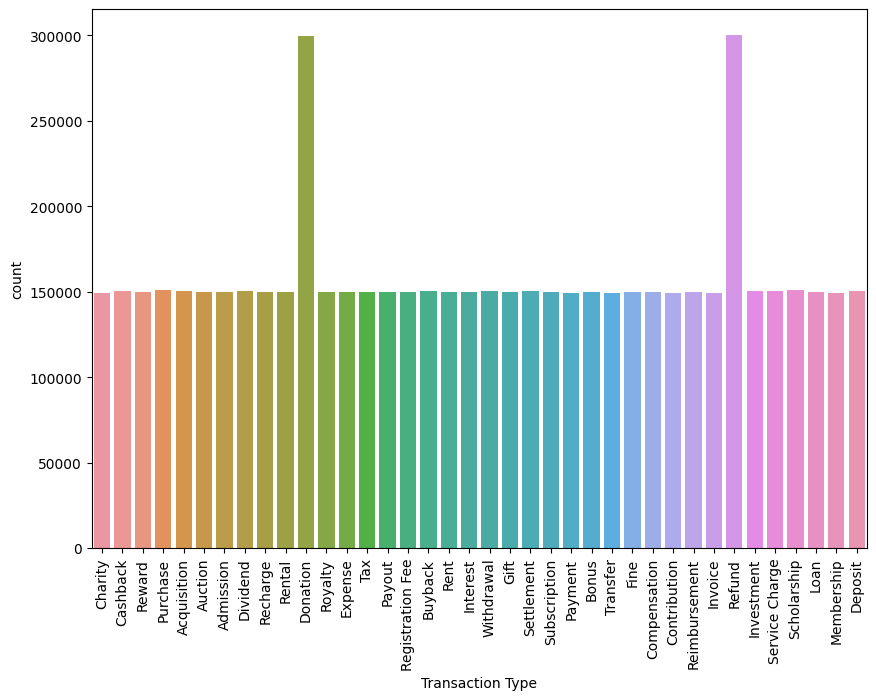

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x=df["Transaction Type"])
plt.xticks(rotation=90);

In [15]:
print(df["Device Type"].value_counts())
print(df["Device Type"].nunique())

Device Type
Smart TV                       158697
Fitness Tracker                158605
IoT Device                     158552
Cash Register                  158464
Kiosk                          158234
Smart Speaker                  158207
Drone                          158170
POS Terminal                   158170
GPS Device                     158153
Mobile                         158151
Smart Appliance                158132
Barcode Scanner                158109
Wearable Device                158105
Smartwatch                     158087
Gaming Console                 158073
Smart Doorbell                 158055
ATM                            157998
Server                         157983
Self-Checkout Kiosk            157919
Laptop                         157875
Tablet                         157875
Home Automation Hub            157837
Augmented Reality Glasses      157801
Industrial Controller          157765
Vehicle Infotainment System    157753
E-Reader                       157747


In [16]:
print(df["Operating System"].unique())
print(df["Operating System"].nunique())

['Tizen' 'Windows Server' 'Android' 'CentOS' 'Ubuntu' 'Mac OS X' 'Windows'
 'Sailfish OS' 'QNX' 'Fedora' 'Unix' 'Android TV' 'Chrome OS' 'tvOS'
 'Solaris' 'watchOS' 'Windows Mobile' 'AIX' 'HarmonyOS' 'Firefox OS'
 'macOS Server' 'Raspbian' 'Linux' 'FreeBSD' 'openSUSE' 'BlackBerry'
 'HP-UX' 'Red Hat Enterprise Linux' 'Debian' 'Chromebook' 'KaiOS'
 'Palm OS' 'Symbian' 'iOS' 'Gentoo' 'Android Wear' 'Arch Linux' 'macOS'
 'MeeGo' 'Windows CE']
40


In [17]:
print(df["Browser Type"].value_counts())
print(df["Browser Type"].nunique())

Browser Type
Qutebrowser          300231
Slimjet              150708
Otter Browser        150575
Midori               150480
Konqueror            150467
Pale Moon            150443
Internet Explorer    150437
Links                150415
Waterfox             150340
Brave                150312
Safari               150308
Chromium             150231
UC Browser           150220
NetSurf              150205
Opera                150149
Surf                 150145
Lynx                 150122
Basilisk             150103
Falkon               150098
Samsung Internet     150074
Vivaldi              150071
Chrome               150037
SeaMonkey            150031
Epiphany             150009
Vimb                 150006
Avant Browser        149996
ELinks               149761
Surfraw              149703
Min                  149658
Beaker               149649
Dooble               149592
Edge                 149564
Silk                 149564
Firefox              149563
Browsh               149544
W3M    

In [18]:
print(df["Transaction Status"].value_counts())
print(df["Transaction Status"].nunique())

Transaction Status
In Progress              151049
Sent                     150663
Transferred              150611
Pending Confirmation     150538
Void                     150532
Debit                    150425
Disputed                 150394
Partially Declined       150365
Hold                     150359
Received                 150358
Under Review             150232
Refunded                 150124
Posted                   150088
Cancelled                150075
Closed                   150070
Cleared                  150043
Pending Review           150031
Declined                 150023
Pending Payment          150012
Approved                 150011
Blocked                  149981
Failed                   149965
Processing               149946
Error                    149896
Rejected                 149894
Settled                  149879
Processed                149851
In Transit               149840
Partially Approved       149826
Delivered                149801
Held for Security    

In [19]:
print(df["User Account Status"].value_counts())
print(df["User Account Status"].nunique())

User Account Status
Trial               334960
Limited             334598
Verified            334485
Pending Approval    333832
Standard            333597
Active              333585
Suspended           333321
New                 333296
Guest               333283
Existing            333086
Unverified          333047
VIP                 332933
Inactive            332848
Premium             332834
Member              332785
Free                332730
Closed              332489
Pro                 332291
Name: count, dtype: int64
18


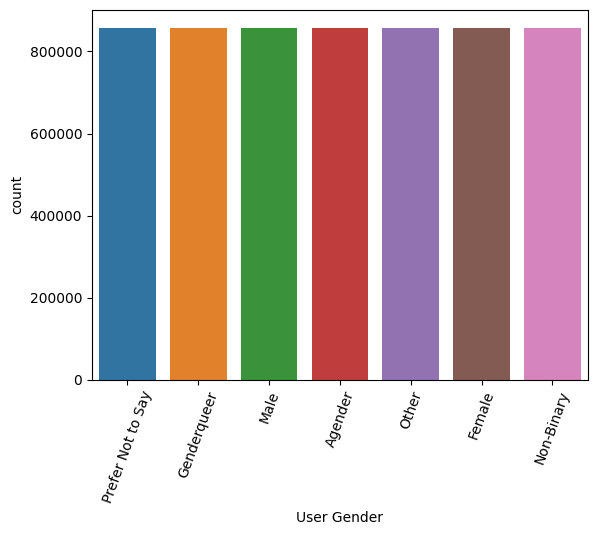

In [20]:
sns.countplot(x=df["User Gender"])
plt.xticks(rotation=70);

In [21]:
print(df["Transaction Authentication Method"].value_counts())
print(df["Transaction Authentication Method"].nunique())

Transaction Authentication Method
Geolocation Verification                 154728
Behavioral Analytics                     154416
SMS Code                                 154397
Hardware Token                           154250
Behavioral Biometrics                    154157
Social Media Login                       154151
Voiceprint                               154102
Email Verification                       154100
Signature Verification                   154081
Smart Card                               154069
Voice Recognition                        154049
Palm Vein Scan                           154038
Push Notification Confirmation           154035
Radio-Frequency Identification (RFID)    154025
Security Question                        154005
NFC Tag                                  153989
Iris Scan                                153951
Biometric Scan                           153881
Knowledge-Based Authentication           153865
Retina Scan                              153856
Transa

In [22]:
print(df["Transaction Purpose"].value_counts())
print(df["Transaction Purpose"].nunique())

Transaction Purpose
Invoice Payment          158411
Dividend Reinvestment    158387
Donation to Nonprofit    158387
Compensation             158362
Service Charge           158297
Buyback                  158288
Insurance Premium        158278
Product Purchase         158260
Recharge                 158231
Fine Settlement          158159
Interest Payment         158117
Subscription Renewal     158092
Membership               158084
Bill Payment             158079
Registration Fee         158072
Charity Donation         158066
Expense Reimbursement    158009
Ticket Purchase          157999
Rental Payment           157999
Deposit                  157986
Retail Purchase          157972
Gift Purchase            157972
Settlement               157954
Consultation Fee         157922
Royalty                  157849
Scholarship              157777
Investment               157771
Payout                   157748
Utility Payment          157730
Cashback Reward          157709
Acquisition         

In [23]:
print(df["Transaction Currency"].value_counts())
print(df["Transaction Currency"].nunique())

Transaction Currency
ZAR    150722
MXN    150710
SEK    150660
MYR    150622
CLP    150574
EGP    150525
CZK    150520
USD    150497
HKD    150431
QAR    150383
AUD    150353
DKK    150244
TRY    150242
COP    150241
INR    150147
SAR    150079
ILS    150066
ARS    150036
RUB    150012
CNY    149996
KRW    149967
CHF    149885
EUR    149830
THB    149823
AED    149820
NOK    149746
NZD    149714
VND    149700
PEN    149635
GBP    149623
HUF    149616
PHP    149606
RON    149602
IDN    149590
PLN    149577
CAD    149548
JPY    149476
KES    149443
SGD    149416
BRL    149323
Name: count, dtype: int64
40


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


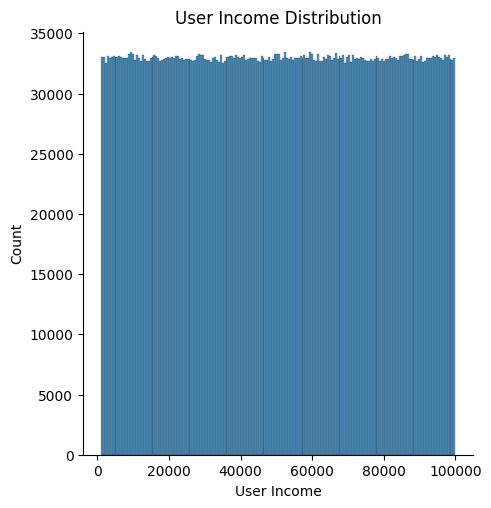

In [24]:
sns.displot(df["User Income"])
plt.title("User Income Distribution");

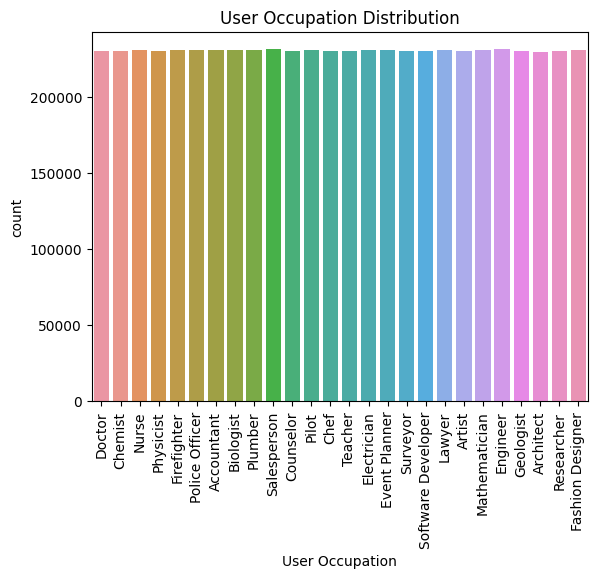

In [25]:
sns.countplot(x=df["User Occupation"])
plt.title("User Occupation Distribution")
plt.xticks(rotation=90);

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


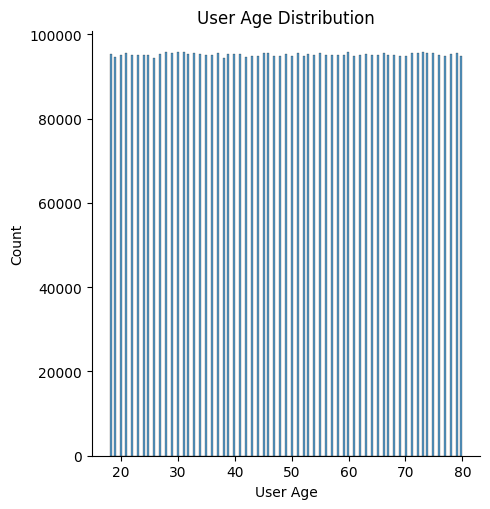

In [26]:
sns.displot(df["User Age"])
plt.title("User Age Distribution");

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


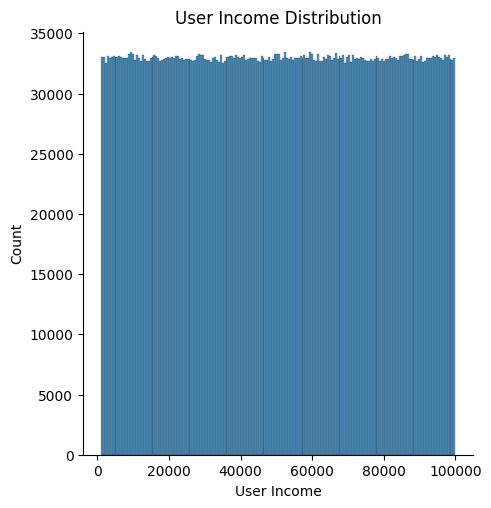

In [27]:
sns.displot(df["User Income"])
plt.title("User Income Distribution");

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Transaction Amount Distribution')

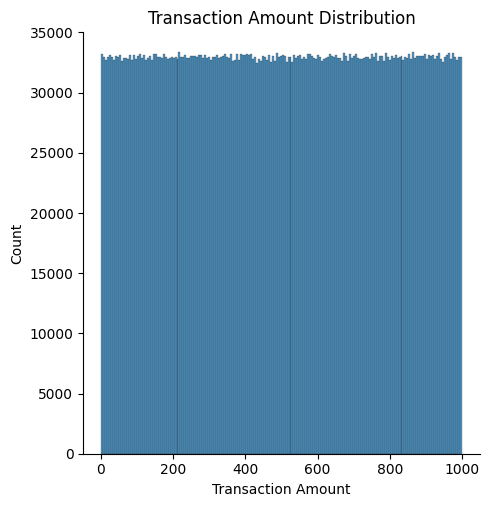

In [28]:
sns.displot(df["Transaction Amount"])
plt.title("Transaction Amount Distribution")

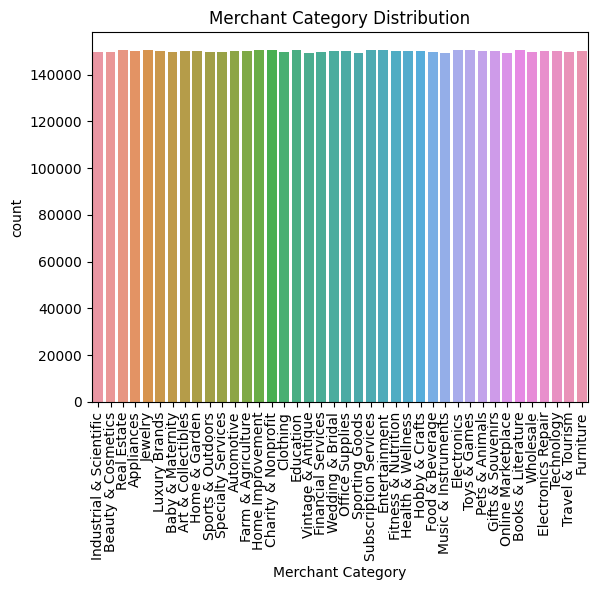

In [29]:
sns.countplot(x=df["Merchant Category"])
plt.title("Merchant Category Distribution")
plt.xticks(rotation=90);

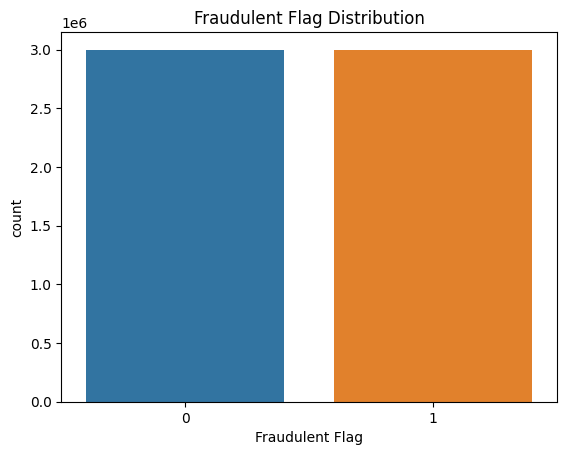

In [30]:
sns.countplot(x=df["Fraudulent Flag"])
plt.title("Fraudulent Flag Distribution");

**BIVARIATE ANALYSIS**

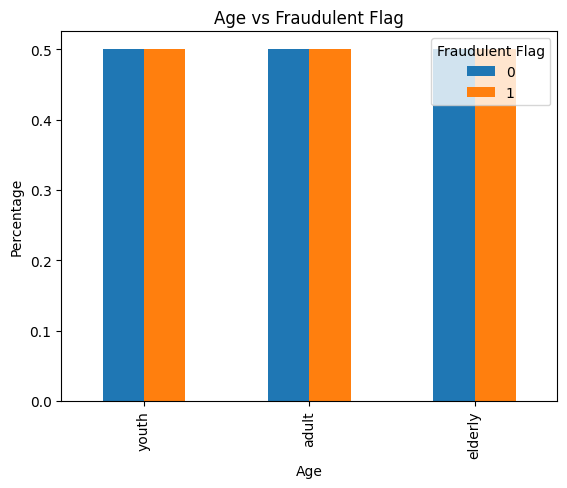

In [31]:
bins = [0, 30, 60, 100]
groups = ["youth", "adult", "elderly"]
df["age_bin"] = pd.cut(df["User Age"], bins, labels=groups)
age_bin = pd.crosstab(df["age_bin"], df["Fraudulent Flag"])
age_bin.div(age_bin.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.title("Age vs Fraudulent Flag");

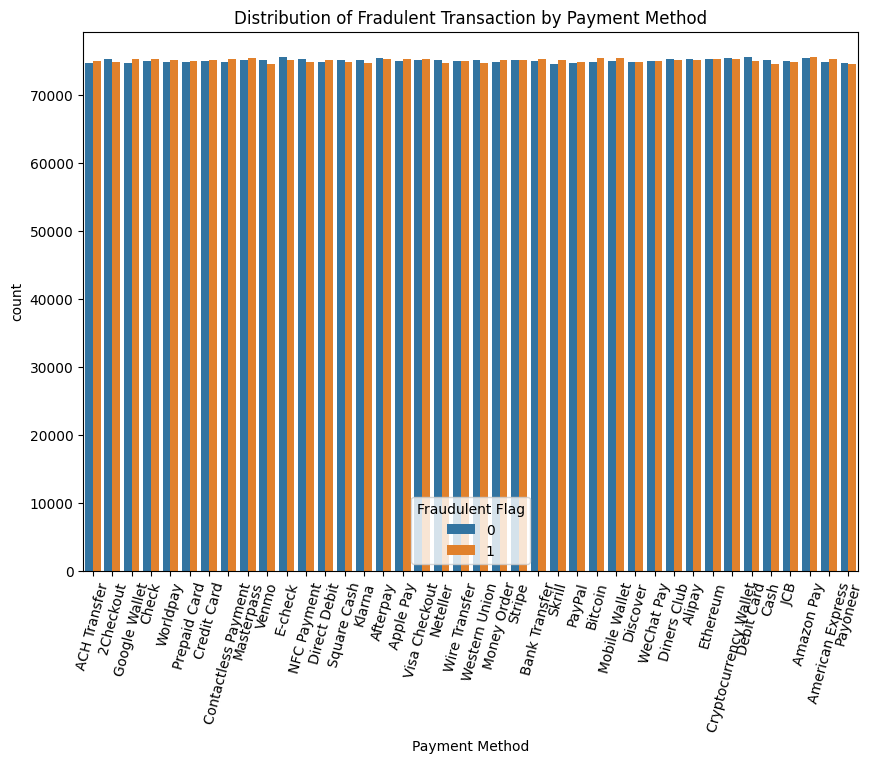

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x=df["Payment Method"], hue=df["Fraudulent Flag"])
plt.xticks(rotation=75)
plt.title("Distribution of Fradulent Transaction by Payment Method");

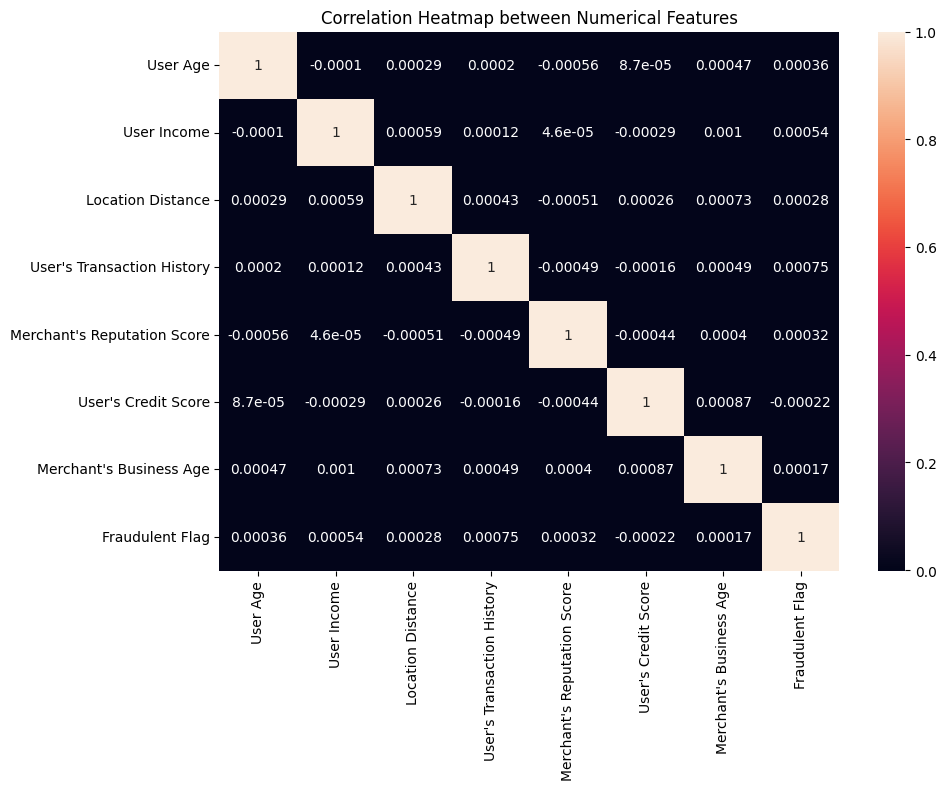

In [33]:
num_cols=df[["User Age", "User Income", "Location Distance", "User's Transaction History", "Merchant's Reputation Score", "User's Credit Score",
        "Merchant's Business Age", "Fraudulent Flag"]]
plt.figure(figsize=(10,7))
sns.heatmap(num_cols.corr(), annot=True)
plt.title("Correlation Heatmap between Numerical Features")
plt.savefig("corr.png")

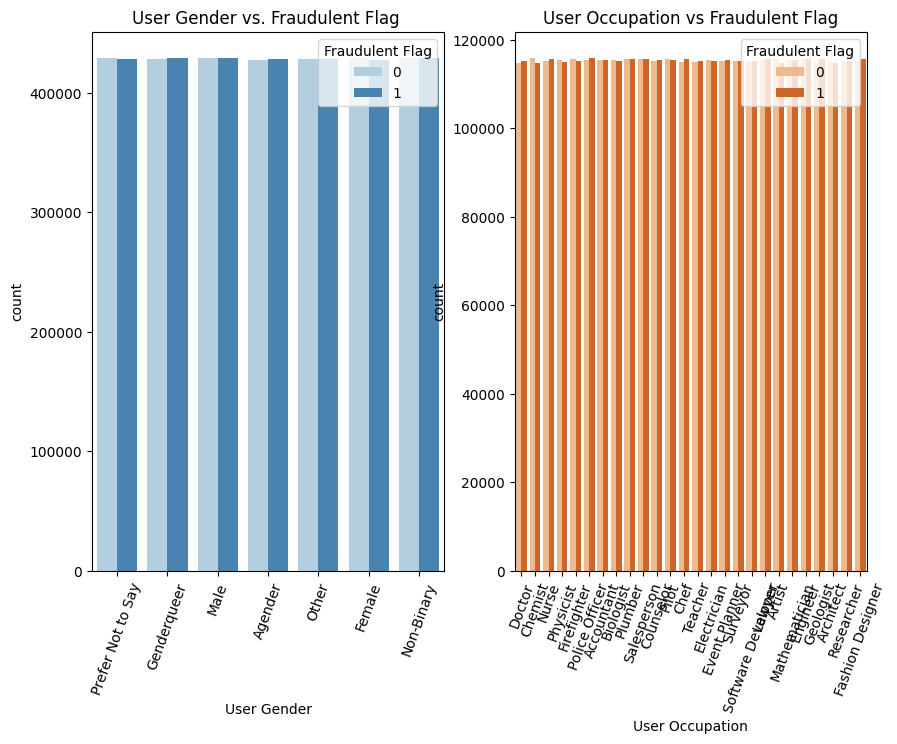

In [34]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(data=df, x="User Gender", hue="Fraudulent Flag", palette="Blues")
plt.xticks(rotation=70)
plt.title("User Gender vs. Fraudulent Flag ")
plt.subplot(1,2,2)
sns.countplot(data=df, x="User Occupation", hue="Fraudulent Flag", palette="Oranges")
plt.xticks(rotation=70)
plt.title("User Occupation vs Fraudulent Flag");

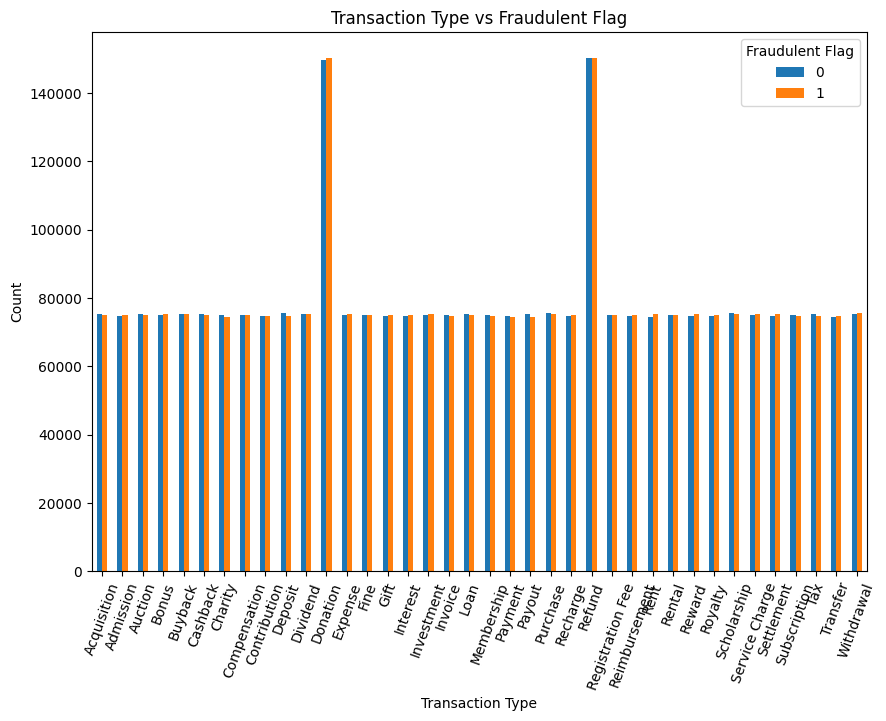

In [35]:
fraud_counts = df.groupby(["Transaction Type", "Fraudulent Flag"]).size().unstack(fill_value=0)
fraud_counts.plot(kind="bar", figsize=(10,7))
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Transaction Type vs Fraudulent Flag")
plt.xticks(rotation=70);

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 33 columns):
 #   Column                             Dtype   
---  ------                             -----   
 0   Transaction ID                     int64   
 1   User ID                            int64   
 2   Transaction Amount                 float64 
 3   Transaction Date and Time          object  
 4   Merchant ID                        int64   
 5   Payment Method                     object  
 6   Country Code                       object  
 7   Transaction Type                   object  
 8   Device Type                        object  
 9   IP Address                         object  
 10  Browser Type                       object  
 11  Operating System                   object  
 12  Merchant Category                  object  
 13  User Age                           int64   
 14  User Occupation                    object  
 15  User Income                        float64 
 16  

In [37]:
df.drop(columns=["Transaction ID", "User ID", "Merchant ID", "IP Address", "User's Email Domain", "User Age"],
        axis=1,
        inplace=True)

In [38]:
print(df.info())
print("________")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 27 columns):
 #   Column                             Dtype   
---  ------                             -----   
 0   Transaction Amount                 float64 
 1   Transaction Date and Time          object  
 2   Payment Method                     object  
 3   Country Code                       object  
 4   Transaction Type                   object  
 5   Device Type                        object  
 6   Browser Type                       object  
 7   Operating System                   object  
 8   Merchant Category                  object  
 9   User Occupation                    object  
 10  User Income                        float64 
 11  User Gender                        object  
 12  User Account Status                object  
 13  Transaction Status                 object  
 14  Location Distance                  float64 
 15  Time Taken for Transaction         float64 
 16  

**Feature Engineering**

In [39]:
df["Transaction Date and Time"] = pd.to_datetime(df["Transaction Date and Time"], errors = "coerce")

In [40]:
def extract_date_info(df, cols):
    for feat in cols:
        df[feat + "_year"] = df[feat].dt.year
        df[feat + "_day"] = df[feat].dt.day
        df[feat + "_month"] = df[feat].dt.month
        df[feat + "_quarter"] = df[feat].dt.quarter
        df[feat + "_weekday"] = df[feat].dt.weekday
        df[feat + "_hour"] = df[feat].dt.hour
        df[feat + "_minute"] = df[feat].dt.minute
        df[feat + "_second"] = df[feat].dt.second
        
extract_date_info(df, ["Transaction Date and Time"])

In [41]:
df.drop(columns=["Transaction Date and Time", "Country Code", "Time Taken for Transaction", "Transaction Time of Day"], axis=1, inplace= True)

In [42]:
df.head()

,Transaction Amount,Payment Method,Transaction Type,Device Type,Browser Type,Operating System,Merchant Category,User Occupation,User Income,User Gender,...,Fraudulent Flag,age_bin,Transaction Date and Time_year,Transaction Date and Time_day,Transaction Date and Time_month,Transaction Date and Time_quarter,Transaction Date and Time_weekday,Transaction Date and Time_hour,Transaction Date and Time_minute,Transaction Date and Time_second
0,163.08,ACH Transfer,Charity,GPS Device,Links,Tizen,Industrial & Scientific,Doctor,66826.21,Prefer Not to Say,...,0,elderly,2023,2,1,1,0,7,47,54
1,430.74,2Checkout,Cashback,Medical Device,Beaker,Windows Server,Beauty & Cosmetics,Chemist,89356.71,Genderqueer,...,1,youth,2021,12,9,3,6,15,15,41
2,415.74,Google Wallet,Reward,Vehicle Infotainment System,Opera,Android,Real Estate,Nurse,58438.63,Male,...,1,elderly,2023,12,1,1,3,17,25,58
3,565.89,Check,Purchase,Kiosk,Konqueror,CentOS,Appliances,Nurse,3426.92,Agender,...,1,elderly,2021,27,2,1,5,11,31,0
4,955.49,Worldpay,Acquisition,Smart Mirror,Basilisk,Ubuntu,Jewelry,Physicist,53080.12,Male,...,1,adult,2022,24,9,3,5,4,6,38


**Data Preprocessing**

In [43]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [44]:
cat_cols = ["Payment Method", "Transaction Type", "Device Type", "Browser Type", "Operating System", "Merchant Category",
           "User Occupation", "User Gender", "User Account Status", "Transaction Status", "User's Device Location", "Transaction Currency",
           "Transaction Purpose", "Transaction Authentication Method", "age_bin"]

In [45]:
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [46]:
df.head()

,Transaction Amount,Payment Method,Transaction Type,Device Type,Browser Type,Operating System,Merchant Category,User Occupation,User Income,User Gender,...,Fraudulent Flag,age_bin,Transaction Date and Time_year,Transaction Date and Time_day,Transaction Date and Time_month,Transaction Date and Time_quarter,Transaction Date and Time_weekday,Transaction Date and Time_hour,Transaction Date and Time_minute,Transaction Date and Time_second
0,163.08,1,6,10,15,27,22,7,66826.21,6,...,0,1,2023,2,1,1,0,7,47,54
1,430.74,0,5,18,2,33,4,5,89356.71,2,...,1,2,2021,12,9,3,6,15,15,41
2,415.74,20,29,34,21,1,29,16,58438.63,3,...,1,1,2023,12,1,1,3,17,25,58
3,565.89,10,22,16,14,6,0,16,3426.92,0,...,1,1,2021,27,2,1,5,11,31,0
4,955.49,39,0,27,1,28,23,17,53080.12,3,...,1,0,2022,24,9,3,5,4,6,38


**Data Splitting**

In [47]:
X = df.drop(columns=["Fraudulent Flag"], axis=1)
y = df["Fraudulent Flag"]

In [49]:
#Scaling the features 
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [52]:
print(X_scaled.head())
print("_______________________")
print(y.head())

   Transaction Amount  Payment Method  Transaction Type  Device Type  \
0           -1.170084       -1.601757         -1.153812    -0.774869   
1           -0.242051       -1.688390         -1.246480    -0.045268   
2           -0.294059        0.044270          0.977551     1.413933   
3            0.226542       -0.822060          0.328875    -0.227668   
4            1.577366        1.690296         -1.709820     0.775532   

   Browser Type  Operating System  Merchant Category  User Occupation  \
0     -0.370486          0.649897           0.217032        -0.733860   
1     -1.537580          1.169612          -1.342565        -1.000615   
2      0.168173         -1.602206           0.823543         0.466541   
3     -0.460262         -1.169109          -1.689143         0.466541   
4     -1.627357          0.736516           0.303677         0.599919   

   User Income  User Gender  ...  Transaction Authentication Method   age_bin  \
0     0.571436     1.500051  ...               

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, stratify=y, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4200000, 30)
X_test shape: (1800000, 30)
y_train shape: (4200000,)
y_test shape: (1800000,)


In [55]:
model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Baseline Accuracy Score is:", accuracy)

Baseline Accuracy Score is: 0.49954166666666666


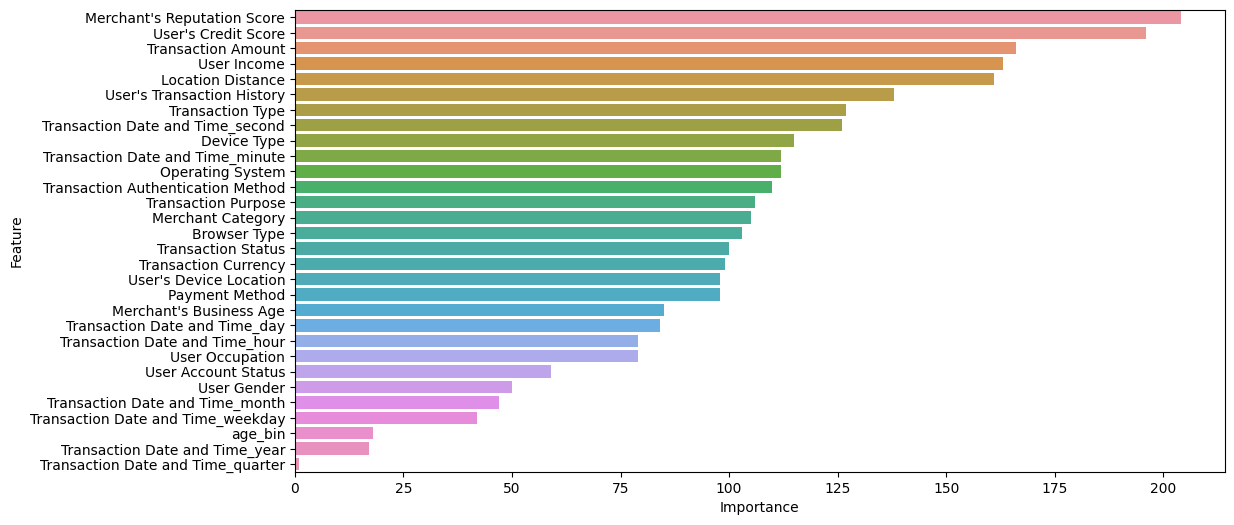

In [56]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=["Importance"])
feature_importance_df["Feature"] = X.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.sort_values(by=["Importance"], ascending= False));


In [58]:
model = LogisticRegression()
param_dist= {
    "penalty": ["l1", "l2"],
    "C": [0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"]
}
random_search = RandomizedSearchCV(
                model,
                param_distributions= param_dist,
                n_iter=10,
                cv=3,
                n_jobs=-1,
                verbose=2,
                random_state=42)

In [60]:
random_search.fit(X_train, y_train)
print("Best Hyperparameters", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 1.3min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 1.1min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 1.1min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.9min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.9min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.9min
[CV] END .......................C=1, penalty=l1, solver=saga; total time= 1.8min
[CV] END .......................C=1, penalty=l1, solver=saga; total time= 2.1min
[CV] END .......................C=1, penalty=l1, solver=saga; total time= 2.1min
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=  18.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=  11.4s
[CV] END ................C=100, penalty=l2, solv

In [ ]:
Accuracy_score = []
params = {
    "solver": "saga",
    "penalty": "l1",
    "C": 1 
}

fold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model1 = LogisticRegression(**params)
    model1.fit(X_train,y_train)
    predss = model1.predict(X_test)
    acc_score= accuracy_score(y_test, predss)
    precision= precision_score(y_test, predss)

Accuracy_score.append(acc_score)
print("Accuracy Score is: ", np.mean(AccuracyScore))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [62]:
best_model = random_search.best_estimator_
y_preds = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_preds)
print(test_accuracy)

0.49956055555555556
